In [565]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)

In [566]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import mglearn

In [567]:
titanic_train = pd.read_csv('../data/titanic/train.csv')
titanic_test = pd.read_csv('../data/titanic/test.csv')
titanic_test_result = pd.read_csv('../data/titanic/gender_submission.csv')

In [568]:
titanic_train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [569]:
titanic_test = pd.merge(titanic_test, titanic_test_result, how='outer')


In [570]:
def titanic_data(raw_data):
    tmp = []
    for each in raw_data['Sex']:
        if each == 'female':
            tmp.append(0)
        elif each == 'male':
            tmp.append(1)
        else:
            tmp.append(np.nan)
            

    tmp_emp =[]    
    for each in raw_data['Embarked']:
        if each == 'S':
            tmp_emp.append(0)
        elif each == 'C':
            tmp_emp.append(1)
        elif each == 'Q':
            tmp_emp.append(2)
        else: tmp_emp.append(0)

            
    raw_data['Embarked'] = tmp_emp
    raw_data['sex'] = tmp
    #raw_data['Age'] = tmp_age
    raw_data['Survived'] = raw_data['Survived'].astype('float')
    raw_data['Pclass'] = raw_data['Pclass'].astype('float')
    raw_data['sex'] = raw_data['sex'].astype('float')
    raw_data['SibSp'] = raw_data['SibSp'].astype('float')
    raw_data['Parch'] = raw_data['Parch'].astype('float')
    raw_data['Fare'] = raw_data['Fare'].astype('float')
    raw_data['Age'] = raw_data['Age'].astype('float')
    raw_data['Name'] = raw_data['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
    
    name_age = pd.DataFrame(raw_data.groupby('Name').Age.median())
    raw_data['Age'].fillna(-1, inplace=True)

    for i in raw_data[raw_data['Age'].isnull()].index:
        for j in name_age.index:
            if raw_data.loc[i]['Name'] == j:
                raw_data.loc[i]['Age']=name_age.loc[j]['median']
                
    tmp_age = []
    for each in raw_data['Age']:
        if each < 10:
            tmp_age.append(0)
        elif (10 <=each) & (each<20) :
            tmp_age.append(1)
        elif (20<=each) & (each<30 ):
            tmp_age.append(2)
        elif (30 <=each) & (each<40) :
            tmp_age.append(3)
        elif (40 <=each) & (each<50) :
            tmp_age.append(4)
        elif (50 <=each) & (each<60) :
            tmp_age.append(5)
        elif (60 <=each) & (each<70) :
            tmp_age.append(6)
        elif (70 <=each) & (each<=80) :
            tmp_age.append(7)
    raw_data['Age'] = tmp_age

    
    
    
    tmp_name =[]    
    for each in raw_data['Name']:
        if each == 'Mr':
            tmp_name.append(5)
        elif each == 'Miss':
            tmp_name.append(4)
        elif each == 'Mrs':
            tmp_name.append(3)
        elif each == 'Master':
            tmp_name.append(2)
        elif (each == 'Dr') or (each == 'Rev'):
            tmp_name.append(1)
        else: tmp_name.append(0)
            
    raw_data['Name'] = tmp_name
    # 미스터, 미세스와 같이 호칭별로 분류

    return raw_data

In [571]:
titanic_train_data = titanic_data(titanic_train)
titanic_test_data = titanic_data(titanic_test)

In [572]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,1,0.0,3.0,5,male,2,1.0,0.0,A/5 21171,7.2500,NaN,0,1.0
1,2,1.0,1.0,3,female,3,1.0,0.0,PC 17599,71.2833,C85,1,0.0
2,3,1.0,3.0,4,female,2,0.0,0.0,STON/O2. 3101282,7.9250,NaN,0,0.0
3,4,1.0,1.0,3,female,3,1.0,0.0,113803,53.1000,C123,0,0.0
4,5,0.0,3.0,5,male,3,0.0,0.0,373450,8.0500,NaN,0,1.0


In [573]:
titanic_train_data.Age.unique()

array([2, 3, 0, 5, 1, 4, 6, 7], dtype=int64)

In [574]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
sex              0
dtype: int64

titanic_train_data.groupby('Name').Survived.count()

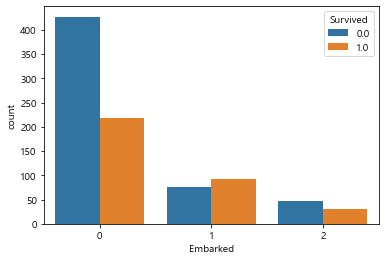

In [575]:
import seaborn as sns
sns.countplot('Embarked', data=titanic_train_data, hue= 'Survived')

In [576]:


'''y_train  = titanic_train_data['Survived'].astype(float)
X_train = titanic_train_data[['Pclass', 'sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X_train.isnull().sum()
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())'''




"y_train  = titanic_train_data['Survived'].astype(float)\nX_train = titanic_train_data[['Pclass', 'sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]\nX_train.isnull().sum()\nX_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())"

In [577]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(titanic_train_data[['Pclass', 'sex', 'Age', 'SibSp', 'Parch', 'Fare',  'Name']], 
                                                    titanic_train_data['Survived'].astype(float), 
                                                    stratify = titanic_train_data['Survived'].astype(float), random_state = 0,
                                                    train_size=0.6)


C:\Users\A\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [578]:
y_target_test = titanic_test_data['Survived'].astype(float)
X_target_test = titanic_test_data[['Pclass', 'sex', 'Age', 'SibSp', 'Parch', 'Fare',  'Name']]
X_target_test['Fare'] = X_target_test['Fare'].fillna(X_target_test['Fare'].median())
X_target_test.isnull().sum()

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Pclass    0
sex       0
Age       0
SibSp     0
Parch     0
Fare      0
Name      0
dtype: int64

In [579]:
X_target_test.Age.unique()

array([3, 4, 6, 2, 1, 0, 5, 7], dtype=int64)

# SVC

In [580]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도 : 0.899
테스트 세트 정확도 : 0.773


In [581]:
#g훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis =0)

#훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis = 0)

# 훈련데이터에 최솟값을 빼고 범위로 나누면 
# 각 특성에 대해 최솟값은 0 최댓값은 1입니다.
X_train_scaled = (X_train - min_on_training) /range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis = 0))
print('\n스케일 전 특성별 최솟값:\n', X_train.min(axis = 0))
print('\n\n특성별 최댓값\n', X_train_scaled.max(axis = 0))
print('\n스케일 전 특성별 최댓값:\n', X_train.max(axis = 0))
X_test_scled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도 : {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(svc.score(X_test_scled, y_test)))

특성별 최솟값
 Pclass    0.0
sex       0.0
Age       0.0
SibSp     0.0
Parch     0.0
Fare      0.0
Name      0.0
dtype: float64

스케일 전 특성별 최솟값:
 Pclass    1.0
sex       0.0
Age       0.0
SibSp     0.0
Parch     0.0
Fare      0.0
Name      0.0
dtype: float64


특성별 최댓값
 Pclass    1.0
sex       1.0
Age       1.0
SibSp     1.0
Parch     1.0
Fare      1.0
Name      1.0
dtype: float64

스케일 전 특성별 최댓값:
 Pclass      3.0000
sex         1.0000
Age         7.0000
SibSp       8.0000
Parch       5.0000
Fare      512.3292
Name        5.0000
dtype: float64
훈련 세트 정확도 : 0.788
테스트 세트 정확도 : 0.784


# DecisionTreeClassifier

In [582]:
from sklearn.tree import DecisionTreeClassifier

for i in tqdm_notebook(range(1,100)):
    tree_clf = DecisionTreeClassifier(random_state=0, max_depth = i )
    tree_clf.fit(X_train, y_train)
    estimators.append(i)
    trainScore.append(format(tree_clf.score(X_train, y_train)))
    TestScore.append(format(tree_clf.score(X_test, y_test)))
    
all_decision = pd.DataFrame({'n_estimators' : estimators,
                          'trainScore' : trainScore,
                          'TestScore': TestScore})
all_decision['trainScore'] = all_decision['trainScore'].astype(float)
all_decision['TestScore'] = all_decision['TestScore'].astype(float)
all_decision[all_decision['TestScore'] == all_decision['TestScore'].max()]  

,n_estimators,trainScore,TestScore
3,4,0.938202,0.851541


In [583]:
tree_clf = DecisionTreeClassifier(max_depth=69, random_state=0)
tree_clf.fit(X_train, y_train)
result = tree_clf.predict(X_target_test)
output = pd.DataFrame({'PassengerId' : titanic_test_data['PassengerId'],
                      'Survived' : result})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('my_submission_decision_tree.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


# 랜덤 포레스트

In [584]:
estimators = []
trainScore =[]
TestScore = []
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(1,50)):
    forest = RandomForestClassifier(n_estimators = i, random_state = 0, max_depth = 14)
    forest.fit(X_train, y_train)
    estimators.append(i)
    trainScore.append(format(forest.score(X_train, y_train)))
    TestScore.append(format(forest.score(X_test, y_test)))
    
all_forest = pd.DataFrame({'n_estimators' : estimators,
                          'trainScore' : trainScore,
                          'TestScore': TestScore})
all_forest['trainScore'] = all_forest['trainScore'].astype(float)
all_forest['TestScore'] = all_forest['TestScore'].astype(float)
all_forest[all_forest['TestScore'] == all_forest['TestScore'].max()]            

,n_estimators,trainScore,TestScore
0,1,0.949438,0.773109
1,2,0.949438,0.773109
2,3,0.949438,0.773109
3,4,0.949438,0.773109
4,5,0.949438,0.773109
5,6,0.949438,0.773109
6,7,0.949438,0.773109
7,8,0.949438,0.773109
8,9,0.949438,0.773109
9,10,0.949438,0.773109


In [585]:
forest = RandomForestClassifier(n_estimators = 8, random_state = 0, max_depth = 14)
forest.fit(X_train, y_train)
result = forest.predict(X_target_test)
output = pd.DataFrame({'PassengerId' : titanic_test_data['PassengerId'],
                      'Survived' : result})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('my_submission_RandomForestClassifier.csv', index=False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# 그레이디언트 부스트 회귀 트리

In [586]:
estimators = []
trainScore =[]
TestScore = []
from tqdm import tqdm_notebook
from sklearn.ensemble import GradientBoostingClassifier
for i in tqdm_notebook(range(1,100)):
    gbrt = GradientBoostingClassifier(n_estimators= 78, random_state= 0, max_depth=i)
    gbrt.fit(X_train, y_train)
    estimators.append(i)
    trainScore.append(format(gbrt.score(X_train, y_train)))
    TestScore.append(format(gbrt.score(X_test, y_test)))
all_Gradient = pd.DataFrame({'n_estimators' : estimators,
                          'trainScore' : trainScore,
                          'TestScore': TestScore})
all_Gradient['trainScore'] = all_Gradient['trainScore'].astype(float)
all_Gradient['TestScore'] = all_Gradient['TestScore'].astype(float)
all_Gradient[all_Gradient['TestScore'] == all_Gradient['TestScore'].max()]

,n_estimators,trainScore,TestScore
3,4,0.938202,0.851541


In [587]:
gbrt = GradientBoostingClassifier(n_estimators= 78, random_state= 0, max_depth=4)
gbrt.fit(X_train, y_train)
result = gbrt.predict(X_target_test)
output = pd.DataFrame({'PassengerId' : titanic_test_data['PassengerId'],
                      'Survived' : result})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('my_submission_Gradient.csv', index=False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# 배깅

In [588]:
estimators = []
trainScore =[]
TestScore = []
from tqdm import tqdm_notebook
from sklearn.ensemble import BaggingClassifier
for i in tqdm_notebook(range(1,100)):
    bagg = BaggingClassifier( DecisionTreeClassifier(),n_estimators= i, random_state = 0)
    bagg.fit(X_train, y_train)
    estimators.append(i)
    trainScore.append(format(bagg.score(X_train, y_train)))
    TestScore.append(format(bagg.score(X_test, y_test)))
    
all_bagg = pd.DataFrame({'Max_depth' : estimators,
                          'trainScore' : trainScore,
                          'TestScore': TestScore})
all_bagg['trainScore'] = all_bagg['trainScore'].astype(float)
all_bagg['TestScore'] = all_bagg['TestScore'].astype(float)
all_bagg[all_bagg['TestScore'] == all_bagg['TestScore'].max()]
    


,Max_depth,trainScore,TestScore
89,90,0.970037,0.815126
92,93,0.970037,0.815126
95,96,0.970037,0.815126
98,99,0.970037,0.815126


In [590]:
from sklearn.svm import SVC
 
clf = SVC()

clf.fit(X_train, y_train)

print("SVC 훈련점수 : {:.2f}".format(clf.score(X_train, y_train)))
print("SVC 테스트점수 : {:.2f}".format(clf.score(X_test, y_test)))

result = clf.predict(X_target_test)
output = pd.DataFrame({'PassengerId' : titanic_test_data['PassengerId'],
                      'Survived' : result})
output['Survived'] = output['Survived'].astype(int)
output.to_csv('my_submission_SVC.csv', index=False)
output.head()



SVC 훈련점수 : 0.90
SVC 테스트점수 : 0.77


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
